**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [2]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv("social_network_ads.csv")
df.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Step 2: Display the number of rows and columns in the dataset
df.shape

(400, 5)

In [4]:
# Step 3: Display the first few rows of the dataset to get an overview
df.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

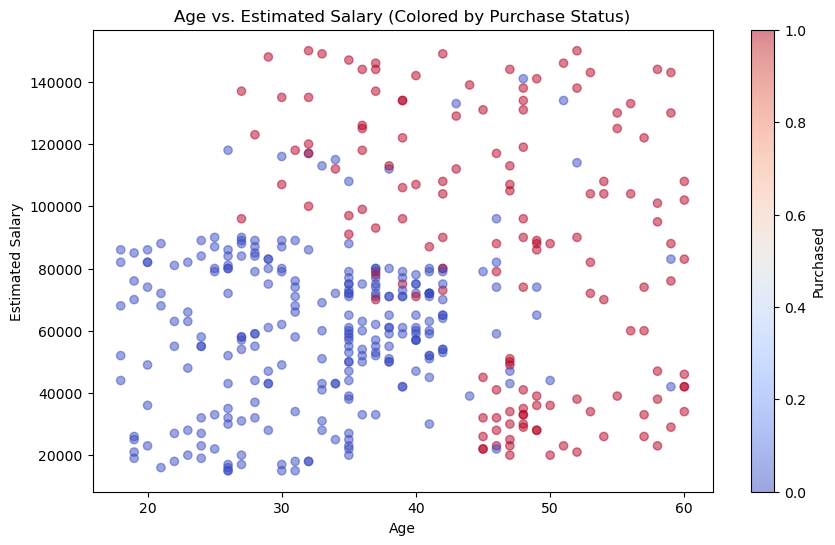

In [6]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
#plt.scatter(df['age'], df['estimated_salary'],color='blue', alpha=0.7, edgecolors='k')
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['estimated_salary'], c=df['purchased'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')
plt.colorbar(label='Purchased')
plt.show()

### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [7]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [8]:
df['gender'].value_counts()

gender
1    204
0    196
Name: count, dtype: int64

In [9]:
# Step 2: Select the features and target variable for modeling
X = df.drop(['purchased','user_id'], axis=1)
y = df['purchased']

In [10]:
X.head()

,gender,age,estimated_salary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64

In [12]:
# Step 3: Split the data into training and test sets with a test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
# Step 4: Initialize and train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8583333333333333

In [14]:
# Step 5: Print the model's coefficients and intercept
model.coef_, model.intercept_
# Step 5: Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[-2.49140898e-01  1.99914592e-01  3.33049168e-05]]
Model intercept: [-10.889199]


### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [15]:
# Step 1: Make predictions on the test set using the trained model
y_preds = model.predict(X_test)
y_preds[:5]

array([0, 1, 0, 1, 0])

In [16]:
# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120

